# Random Forest

## Load Packages and Prep Data

In [10]:
# packages
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [12]:
# load data
train_data = pd.read_csv('data/train_data_fe.csv')
test_data = pd.read_csv('data/test_data_fe.csv')
print(train_data.shape)
print(test_data.shape)

(62889, 46)
(15723, 46)


In [13]:
# drop unneeded columns
train_data.drop(['stone_soil', 'id', 'img_id'], axis=1, inplace = True)
test_data.drop(['stone_soil', 'id', 'img_id'], axis=1, inplace = True)

In [14]:
# prep data
y_train = train_data['stone_soil_enc']
X_train = train_data.drop(['stone_soil_enc'], axis=1)
y_test = test_data['stone_soil_enc']
X_test = test_data.drop(['stone_soil_enc'], axis=1)

In [15]:
# define a function for scoring
def pred_metrics(real, pred) -> None:
    print("Accuracy:\t{}".format(accuracy_score(real, pred)))
    print("Precision:\t{}".format(precision_score(real, pred)))
    print("Recall:\t\t{}".format(recall_score(real, pred)))
    print("F1:\t\t{}".format(f1_score(real, pred)))

## Model 1
- Default hyperparameters

In [16]:
# fit Random Forest model
rf_1 = RandomForestClassifier()
x = rf_1.fit(X_train, y_train)

In [17]:
# cross validation
# low f1 score indicates low precision and low recall
score = cross_val_score(rf_1, X_train, y_train, scoring = "f1")
print(score.round(decimals=4))
print(score.mean().round(decimals=4))

[0.7338 0.7198 0.7311 0.7132 0.71  ]
0.7216


## Model 2
- Hyperparameter grid search

In [18]:
# find best parameters by grid search
params = {'n_estimators':range(60,91,10), 'max_depth':range(7,14,2), 'min_samples_split':range(80,121,20), 'min_samples_leaf':range(40,61,10)}
gs = GridSearchCV(RandomForestClassifier(max_features='sqrt' ,random_state=10), params, cv=5, scoring='f1', n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

# store best model
rf_2 = gs.best_estimator_

{'max_depth': 13, 'min_samples_leaf': 40, 'min_samples_split': 100, 'n_estimators': 90}
0.6623578963934849


In [19]:
# cross validation
# low f1 score indicates low precision and low recall
score = cross_val_score(rf_2, X_train, y_train, scoring = "f1")
print(score.round(decimals=4))
print(score.mean().round(decimals=4))

[0.6633 0.6667 0.6808 0.6556 0.6454]
0.6624


## Test

In [20]:
# test the performance of the selected model
y_pred = rf_2.predict(X_test)
pred_metrics(y_test,y_pred)

Accuracy:	0.9577688736246264
Precision:	0.7751633986928105
Recall:		0.5465437788018433
F1:		0.6410810810810811


<AxesSubplot:>

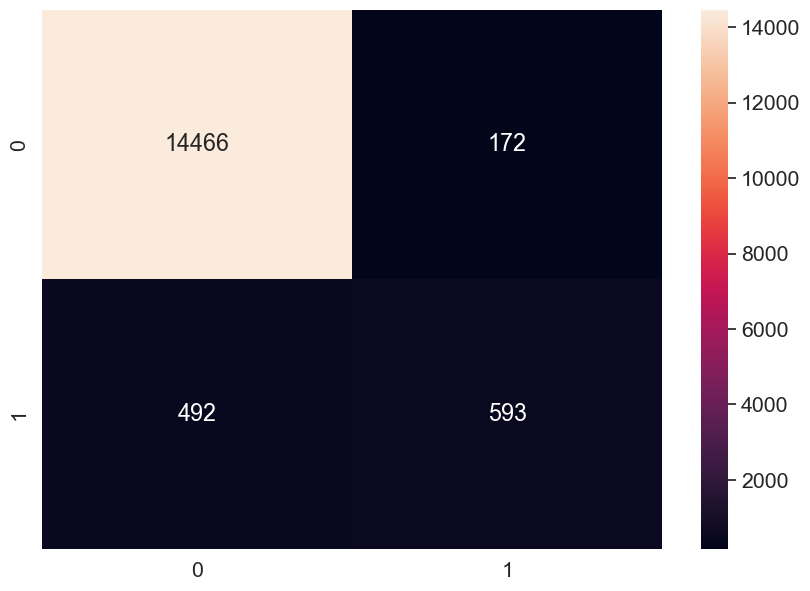

In [21]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')